<a href="https://colab.research.google.com/github/Nour543/NLP-Project/blob/main/My_NLP_Project___2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWit211fGtF56w97m8U59ZCLaxvbFXZRCItS5FzqGKhgzZY8BBi2-To
Mounted at /content/drive


In [3]:
# Installs
#!pip install spellchecker
!pip install pyspellchecker
!pip install vaderSentiment
!pip install transformers
!pip install torchtext
!pip install sentencepiece

     |████████████████████████████████| 2.7 MB 11.5 MB/s 
     |████████████████████████████████| 125 kB 15.0 MB/s 
     |████████████████████████████████| 2.9 MB 14.9 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 55.0 MB/s 
     |████████████████████████████████| 596 kB 44.0 MB/s 
     |████████████████████████████████| 895 kB 51.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 16.3 MB/s 


In [4]:
# Libraries / Imports

from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from spellchecker import SpellChecker
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from __future__ import print_function

import transformers
from transformers import pipeline, AutoTokenizer, BertTokenizer, TFBertModel, AlbertTokenizer, TFAlbertModel

import tensorflow as tf
from tensorflow import keras


from keras import layers
from keras.models import Sequential
from keras.preprocessing import sequence 
from keras.layers import Embedding, GlobalMaxPool1D, GlobalAveragePooling1D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import PorterStemmer

import torch
from torchtext import data
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator
import torch.nn as nn

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
# Downloads

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
# Import data
 
df1 = pd.read_csv('/content/drive/MyDrive/labeled_data.csv', delimiter=',') 
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
# ok = df1[df1['class']==2]
# tweet0 = ok['tweet']

# not_ok = df1[df1['class']!=2]
# tweet1 = not_ok['tweet']

In [7]:
selected_columns = df1[["tweet","class"]]

df = selected_columns.copy()

df.rename(columns = {'class': 'Hsbinary'}, inplace = True)

df['Hsbinary']=df['Hsbinary'].replace(0,'off', regex=True)
df['Hsbinary']=df['Hsbinary'].replace(1,'off', regex=True)
df['Hsbinary']=df['Hsbinary'].replace(2,'ok', regex=True)

df['Hsbinary']=df['Hsbinary'].replace('off',1, regex=True)
df['Hsbinary']=df['Hsbinary'].replace('ok',0, regex=True)

df.head()

,tweet,Hsbinary
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


1. Use any of the hate speech/cyberbullying databases maintained at http://hatespeechdata.com/. In addition, there is two additional cyberbullying datasets available at https://github.com/saroarjahan/Negation_project/, AskFm and FormSpring, which can be used as well. We would like to investigate the structure of the dataset in terms of the categories present. Consider the subclass S1 of hate/cyberbullying content and subclass S2 of non-abusive content. Draw a word-cloud representation of S1 and S2 and explain the word features.

In [8]:
df['Hsbinary'].value_counts()

1    20620
0     4163
Name: Hsbinary, dtype: int64

In [9]:
# Making subclasses S1: abusive content (class = 1), S2: non abusive content(class = 0)
S1 = df[df['Hsbinary']==1]
#S1.to_csv("not_ok.csv")

S2 = df[df['Hsbinary']==0]
#S2.to_csv("ok.csv")

In [20]:
#S1.head()
#S2.head()

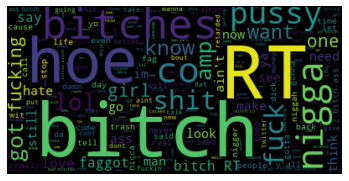

In [21]:
# Wordcloud 1: abusive
text_S1 = " ".join(t for t in S1.tweet)
wordcloud = WordCloud().generate(text_S1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

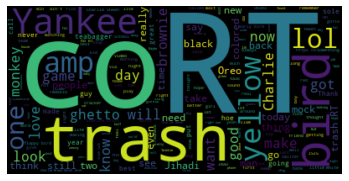

In [22]:
# Wordcloud 2: non abusive
text_S2 = " ".join(t for t in S2.tweet)
wordcloud = WordCloud().generate(text_S2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# split into training/ test data

#X: Feature data
X = df['tweet']

#y: class
y = df['Hsbinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Pipeline: TF-IDF Vectorizer + LR Classifier , data before processing
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

#X_train = df_train['tweet_processed']
text_clf.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion Matrix:  \n", metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(y_test,predictions))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(y_test, predictions))

# F1 Score
print("F1 Score:  ", metrics.f1_score(y_test, predictions))

Confusion Matrix:  
 [[ 831  430]
 [ 126 6048]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1261
           1       0.93      0.98      0.96      6174

    accuracy                           0.93      7435
   macro avg       0.90      0.82      0.85      7435
weighted avg       0.92      0.93      0.92      7435

Accuracy Score:   0.9252185608607936
F1 Score:   0.9560543787543471


2.a. Perform dataset pre-processing examples stop-word removal, stemming, special character removal, emoji removal, number, hashtag, mention tag, etc. Report different preprocessing outcome and try to explain the results. 

In [11]:
df_train = pd.DataFrame(list(zip(X_train, y_train)), columns =['tweet', 'Hsbinary'])
df_train.to_csv("train_raw.csv")
#files.download('train_raw.csv')

df_test = pd.DataFrame(list(zip(X_test, y_test)), columns =['tweet', 'Hsbinary'])
df_test.to_csv("test.csv")
#files.download('test.csv')

In [12]:
df_train.head()

,tweet,Hsbinary
0,Charlie Jacobs got confused about the ice buck...,0
1,@JuanNDaCut @ShareA40Ounce she playin pussy ho...,1
2,I be telling Mcgirt music ain't enough.You got...,1
3,@IHateStevenSing\nI ain't to show bout dem col...,0
4,RT @blessedarti: Y'all claim you want a good &...,1


In [13]:
# remove mention urls, tags and hashtags

def clean1(txt):
  cleantext = re.sub('@[A-Za-z0-9]+', '', txt)
  return cleantext

def clean2(txt):
  cleantext = re.sub('#[A-Za-z0-9]+', '', txt)
  return cleantext

def clean3(txt):
  cleantext = re.sub('http\S+|www.\S+', '', txt)
  return cleantext

In [14]:
df_train['tweet_processed'] = df_train['tweet'].apply(lambda X: clean1(X))

#df_train.head()

In [15]:
df_train['tweet_processed'] = df_train['tweet_processed'].apply(lambda X: clean2(X))

#df_train.head()

In [16]:
df_train['tweet_processed'] = df_train['tweet_processed'].apply(lambda X: clean3(X))

#df_train.head()

In [17]:
# Removing unnecessary whitespaces
def remove_whitespace(text):
    return  " ".join(text.split())

df_train['tweet_processed'] = df_train['tweet_processed'].apply(remove_whitespace)

In [18]:
# Tokenization
df_train['tweet_processed'] = df_train['tweet_processed'].apply(lambda X: word_tokenize(X))

In [19]:
# Remove proper nouns (not tested yet)

df_train['pos']=df_train['tweet_processed'].apply(nltk.pos_tag)

def prop_list(text):
  prop_words = []
  for (word, tag) in text:
    if tag == 'NNP': 
      prop_words.append(word)
  return prop_words
  

propw = df_train['pos'].apply(lambda X: prop_list(X))
propn = [item for sublist in propw for item in sublist]
#print(propn)

def remove_prop(text):
    result = []
    for token in text:
        if token not in propn:
            result.append(token)
    return result

df_train['tweet_processed'] = df_train['tweet_processed'].apply(remove_prop)

In [20]:
df_train.head()

,tweet,Hsbinary,tweet_processed,pos
0,Charlie Jacobs got confused about the ice buck...,0,"[got, confused, about, the, ice, bucket, chall...","[(Charlie, NNP), (Jacobs, NNP), (got, VBD), (c..."
1,@JuanNDaCut @ShareA40Ounce she playin pussy ho...,1,"[she, playin, hole, bingo, ., She, drawing, th...","[(she, PRP), (playin, VBD), (pussy, JJ), (hole..."
2,I be telling Mcgirt music ain't enough.You got...,1,"[I, be, telling, music, ai, n't, enough.You, g...","[(I, PRP), (be, VB), (telling, VBG), (Mcgirt, ..."
3,@IHateStevenSing\nI ain't to show bout dem col...,0,"[I, ai, n't, to, show, bout, dem, colored, dia...","[(I, PRP), (ai, VBP), (n't, RB), (to, TO), (sh..."
4,RT @blessedarti: Y'all claim you want a good &...,1,"[:, claim, you, want, a, good, &, amp, ;, loya...","[(RT, NN), (:, :), (Y'all, JJ), (claim, NN), (..."


In [35]:
# OPTIONAL, TAKES A FEW MINS #########################

# def spell_check(text):
    
#     result = []
#     spell = SpellChecker()
#     for word in text:
#         correct_word = spell.correction(word)
#         result.append(correct_word)
    
#     return result

# df_train['tweet_processed'] = df_train['tweet_processed'].apply(spell_check)

In [21]:
en_stopwords = stopwords.words('english')
en_stopwords.remove('not')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

df_train['tweet_processed'] = df_train['tweet_processed'].apply(remove_stopwords)

In [22]:
# Stemming (keep?)

def stemming(text):
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word))
    return result

df_train['tweet_processed'] = df_train['tweet_processed'].apply(stemming)

In [23]:
# remove special characters and numbers

def remove_punct(text):
    
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

df_train['tweet_processed'] = df_train['tweet_processed'].apply(remove_punct)

In [24]:
# Detokenization

df_train['tweet_processed'] = df_train['tweet_processed'].apply(lambda X: TreebankWordDetokenizer().detokenize(X))
df_train['tweet_processed'].head(10)

0    got confus ice bucket challeng instead dump bu...
1               playin hole bingo she draw next number
2    I tell music ai n t enough y gotta non music r...
3    I ai n t show bout dem color diamond talk radi...
4    claim want good amp loyal girl keep mess like ...
5                        not bitch dont love give head
6                       could n t wait till dress like
7                                        gt food pussy
8                                       comeback pussi
9              _andrew thi bitch death grip nigga ball
Name: tweet_processed, dtype: object

In [ ]:
df_train['tweet_processed'].str.lower()

In [31]:
X_train = df_train['tweet_processed']
df_train_pro = pd.DataFrame(list(zip(X_train, y_train)), columns =['tweet', 'Hsbinary'])
df_train_pro.to_csv("train_pro.csv")
#files.download('train_pro.csv')

2.b. Use simple LR classifier and tf-idf as feature representation for different pre-processing performance comparisons. Use best pre-processing for rest of the  experiments.

In [40]:
# Pipeline: TF-IDF Vectorizer + LR Classifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

X_train = df_train['tweet_processed']
text_clf.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf.predict(X_test)

# Report the confusion matrix
print("Confusion Matrix:  \n", metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(y_test,predictions))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(y_test, predictions))

# F1 Score
print("F1 Score:  ", metrics.f1_score(y_test, predictions))

Confusion Matrix:  
 [[ 808  453]
 [ 217 5957]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1261
           1       0.93      0.96      0.95      6174

    accuracy                           0.91      7435
   macro avg       0.86      0.80      0.83      7435
weighted avg       0.91      0.91      0.91      7435

Accuracy Score:   0.9098856758574311
F1 Score:   0.9467577876668786


3. Perform Sentiment analysis of each of the posts and get positive, negative, or neutral scores. You can use sentiment Vader (https://github.com/cjhutto/vaderSentiment). Use this sentiment score as a feature and report classification Accuracy and F1 score by using simple Logistic Regression as classifier and sentiment score as a feature. Dou you think sentiment analysis can be used as feature? 

In [41]:
# VADER, raw data + evaluation
 
sid = SentimentIntensityAnalyzer()
   
df_train['scores'] = df_train['tweet'].apply(lambda t: sid.polarity_scores(t))

df_train['compound']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])

df_train['comp_score'] = df_train['compound'].apply(lambda c: 0 if c >=0 else 1)

#df_train.head(10) 


print("Confusion Matrix:  \n", metrics.confusion_matrix(df_train['Hsbinary'],df_train['comp_score']))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(df_train['Hsbinary'],df_train['comp_score']))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(df_train['Hsbinary'],df_train['comp_score']))

# F1 Score
print("F1 Score:  ", metrics.f1_score(df_train['Hsbinary'],df_train['comp_score']))

Confusion Matrix:  
 [[2155  747]
 [4669 9777]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.32      0.74      0.44      2902
           1       0.93      0.68      0.78     14446

    accuracy                           0.69     17348
   macro avg       0.62      0.71      0.61     17348
weighted avg       0.83      0.69      0.73     17348

Accuracy Score:   0.6878026285450772
F1 Score:   0.7830997196635963


In [42]:
# VADER, processed data
 
sid = SentimentIntensityAnalyzer()
   
df_train['scores'] = df_train['tweet_processed'].apply(lambda t: sid.polarity_scores(t))

df_train['compound']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])

df_train['comp_score'] = df_train['compound'].apply(lambda c: 0 if c >=0 else 1)

#df_train.head(10)   

print("Confusion Matrix:  \n", metrics.confusion_matrix(df_train['Hsbinary'],df_train['comp_score']))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(df_train['Hsbinary'],df_train['comp_score']))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(df_train['Hsbinary'],df_train['comp_score']))

# F1 Score
print("F1 Score:  ", metrics.f1_score(df_train['Hsbinary'],df_train['comp_score']))

Confusion Matrix:  
 [[2257  645]
 [4584 9862]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.33      0.78      0.46      2902
           1       0.94      0.68      0.79     14446

    accuracy                           0.70     17348
   macro avg       0.63      0.73      0.63     17348
weighted avg       0.84      0.70      0.74     17348

Accuracy Score:   0.6985819691030667
F1 Score:   0.7904460385524787


4. Run classification with LR and tf-itdf as a baseline model so that you can compare the result with other state-of-the-art practices. Study the implementation available at https://github.com/pinkeshbadjatiya/twitter-hatespeech of the paper "Deep learning for hate speech detection Tweets" by Pinkesh Badjatiya (www'17 proceedings, 2017) report result of the Accuracy and F1 score. Try to implement CNN+fastText architecture.

In [43]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train = df_train['tweet_processed'] 


############ SPECIAL CASE: Imbalanced data: Resample (didn't work)
# from sklearn.utils import resample
# Offensive = df_train[df_train['Hsbinary']==1]
# Okay = df_train[df_train['Hsbinary']==0]

# Off_upsampled = resample(Offensive,
#                replace=True,
#                n_samples=len(Okay),
#                random_state=42)

# upsampled = pd.concat([Okay, Off_upsampled])
# X_train = upsampled['tweet_processed'] 
# y_train = upsampled['Hsbinary'] 

In [44]:
# Data Format

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train) # encoding
x_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [45]:
# Pad Sequences

maxlen = 300

X_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [49]:
# Model 1 (random)
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #trying 2 instead of 1
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           692000    
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                150010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 842,021
Trainable params: 842,021
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    #class_weight= class_weight,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
1735/1735 - 11s - loss: 0.2112 - accuracy: 0.9165 - val_loss: 0.2401 - val_accuracy: 0.8937
Epoch 2/10
1735/1735 - 8s - loss: 0.1203 - accuracy: 0.9607 - val_loss: 0.2163 - val_accuracy: 0.9048
Epoch 3/10
1735/1735 - 8s - loss: 0.0869 - accuracy: 0.9726 - val_loss: 0.2313 - val_accuracy: 0.9064
Epoch 4/10
1735/1735 - 8s - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.2374 - val_accuracy: 0.9128
Epoch 5/10
1735/1735 - 8s - loss: 0.0389 - accuracy: 0.9886 - val_loss: 0.2859 - val_accuracy: 0.9076
Epoch 6/10
1735/1735 - 7s - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.3012 - val_accuracy: 0.9098
Epoch 7/10
1735/1735 - 8s - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.3474 - val_accuracy: 0.9069
Epoch 8/10
1735/1735 - 8s - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.5167 - val_accuracy: 0.8819
Epoch 9/10
1735/1735 - 8s - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.4566 - val_accuracy: 0.9022
Epoch 10/10
1735/1735 - 7s - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.4698 -

In [51]:
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro")) # !!!!!!!!!!!!
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.0848016139878951
Recall =  0.5
F1 Score =  0.14500919963201472


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
set(y_test) - set(y_pred) # !!!!!!!!!!!! 

{1}

In [53]:
# MODEL 2

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 50)           692000    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 692,521
Trainable params: 692,521
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

Epoch 1/10
1735/1735 - 9s - loss: 0.1830 - accuracy: 0.9234 - val_loss: 0.2451 - val_accuracy: 0.8963
Epoch 2/10
1735/1735 - 8s - loss: 0.0860 - accuracy: 0.9692 - val_loss: 0.1919 - val_accuracy: 0.9278
Epoch 3/10
1735/1735 - 8s - loss: 0.0587 - accuracy: 0.9807 - val_loss: 0.1848 - val_accuracy: 0.9287
Epoch 4/10
1735/1735 - 8s - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.2061 - val_accuracy: 0.9248
Epoch 5/10
1735/1735 - 8s - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.2345 - val_accuracy: 0.9227
Epoch 6/10
1735/1735 - 8s - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.2705 - val_accuracy: 0.9192
Epoch 7/10
1735/1735 - 8s - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.2962 - val_accuracy: 0.9177
Epoch 8/10
1735/1735 - 8s - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.3207 - val_accuracy: 0.9159
Epoch 9/10
1735/1735 - 8s - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.3357 - val_accuracy: 0.9161
Epoch 10/10
1735/1735 - 8s - loss: 0.0054 - accuracy: 0.9979 - val_loss: 0.3573 - 

In [55]:
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.0848016139878951
Recall =  0.5
F1 Score =  0.14500919963201472


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
set(y_test) - set(y_pred)

{1}

In [57]:
# CNN

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 100)          1384000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,449,429
Trainable params: 1,449,429
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
1735/1735 - 39s - loss: 0.1502 - accuracy: 0.9386 - val_loss: 0.1777 - val_accuracy: 0.9243
Epoch 2/20
1735/1735 - 11s - loss: 0.0753 - accuracy: 0.9738 - val_loss: 0.1838 - val_accuracy: 0.9259
Epoch 3/20
1735/1735 - 11s - loss: 0.0362 - accuracy: 0.9875 - val_loss: 0.2813 - val_accuracy: 0.9141
Epoch 4/20
1735/1735 - 11s - loss: 0.0176 - accuracy: 0.9936 - val_loss: 0.3382 - val_accuracy: 0.9180
Epoch 5/20
1735/1735 - 11s - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.4147 - val_accuracy: 0.9114
Epoch 6/20
1735/1735 - 11s - loss: 0.0060 - accuracy: 0.9976 - val_loss: 0.4346 - val_accuracy: 0.9131
Epoch 7/20
1735/1735 - 11s - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.4679 - val_accuracy: 0.9173
Epoch 8/20
1735/1735 - 11s - loss: 0.0042 - accuracy: 0.9980 - val_loss: 0.5530 - val_accuracy: 0.9158
Epoch 9/20
1735/1735 - 11s - loss: 0.0036 - accuracy: 0.9983 - val_loss: 0.5716 - val_accuracy: 0.9118
Epoch 10/20
1735/1735 - 11s - loss: 0.0058 - accuracy: 0.9979 - val_loss:

In [59]:
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.0848016139878951
Recall =  0.5
F1 Score =  0.14500919963201472


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
####################### FastText #######################

def create_ngram_set(input_list, ngram_value=2):
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)

    return new_sequences

# Set parameters:
# ngram_range = 2 will add bi-grams features
ngram_range = 2
max_features = 20000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 5

In [61]:
if ngram_range > 1:
    print('Adding {}-gram features'.format(ngram_range))
    # Create set of unique n-gram from the training set.
    ngram_set = set()
    
    xtrain_lst =  X_train.tolist()
    xtest_lst =  X_test.tolist()
    
    for input_list in xtrain_lst:
        for i in range(2, ngram_range + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)

    # Dictionary mapping n-gram token to a unique integer.
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.
    start_index = max_features + 1
    token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}

    # max_features is the highest integer that could be found in the dataset.
    max_features = np.max(list(indice_token.keys())) + 1

    # Augmenting x_train and x_test with n-grams features
    x_train = add_ngram(xtrain_lst, token_indice, ngram_range)
    x_test = add_ngram(xtest_lst, token_indice, ngram_range)
    #print('Average train sequence length: {}'.format(
    #    np.mean(list(map(len, x_train)), dtype=int)))
    #print('Average test sequence length: {}'.format(
    #    np.mean(list(map(len, x_test)), dtype=int)))

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(x_train, maxlen=maxlen)
X_test = sequence.pad_sequences(x_test, maxlen=maxlen)
#print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)

Adding 2-gram features
Pad sequences (samples x time)


In [64]:
model = Sequential()

model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 50)           5044700   
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 5,044,751
Trainable params: 5,044,751
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/5
543/543 - 5s - loss: 0.4709 - accuracy: 0.8317 - val_loss: 0.4550 - val_accuracy: 0.8304
Epoch 2/5
543/543 - 4s - loss: 0.4485 - accuracy: 0.8327 - val_loss: 0.4538 - val_accuracy: 0.8304
Epoch 3/5
543/543 - 4s - loss: 0.4452 - accuracy: 0.8327 - val_loss: 0.4525 - val_accuracy: 0.8304
Epoch 4/5
543/543 - 4s - loss: 0.4409 - accuracy: 0.8327 - val_loss: 0.4503 - val_accuracy: 0.8304
Epoch 5/5
543/543 - 4s - loss: 0.4346 - accuracy: 0.8327 - val_loss: 0.4482 - val_accuracy: 0.8304
543/543 - 1s - loss: 0.4299 - accuracy: 0.8327
Training Accuracy: 0.8327
233/233 - 0s - loss: 0.4482 - accuracy: 0.8304
Testing Accuracy:  0.8304


In [66]:
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.0848016139878951
Recall =  0.5
F1 Score =  0.14500919963201472


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*****************************************************************************************************
*****************************************************************************************************
*****************************************************************************************************

5. Run sate-of-the-art practices BERT model, example  BERT-base-uncased and BERT-multilingual, report both model Accuracy and F1 score. Scripts available on GitHub page https://github.com/saroarjahan/Negation_project/ . Student are open to experimenting with other BERT models, for example, BERT related specifically to hate. Different BERT models can be found here https://huggingface.co/models .

In [25]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = transformers.BertModel.from_pretrained("bert-base-multilingual-uncased")

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/641M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
model.eval()
if torch.cuda.is_available():
    model = model.cuda()

In [27]:
bert=model

In [28]:
#check if gpu exists
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [32]:
#Read the data 
train = pd.read_csv("train_pro.csv")
valid = pd.read_csv("test.csv")

In [33]:
# Model parameter
MAX_SEQ_LEN = 128
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('Hsbinary', label_field),('tweet', text_field)]

# TabularDataset

train, valid= TabularDataset.splits( path="", train='train_pro.csv', validation='test.csv',
                                            format='CSV', fields=fields, skip_header=True)


# Iterators

train_iter = BucketIterator(train, batch_size=4, sort_key=lambda x: len(x.tweet),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=4, sort_key=lambda x: len(x.tweet),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(valid, batch_size=4, device=device, train=False, shuffle=False, sort=False)

In [34]:
train_iter

In [35]:
class BERTGRUSentiment(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        embedding_dim = bert.config.to_dict()['hidden_size']
        
        self.rnn = nn.GRU(768,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [batch size, sent len]
                
        with torch.no_grad():
            embedded = self.bert(text)[0]
                
        #embedded = [batch size, sent len, emb dim]
        
        _, hidden = self.rnn(embedded)
        
        #hidden = [n layers * n directions, batch size, emb dim]
        
        if self.rnn.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim]
        
        output = self.out(hidden)
        
        #output = [batch size, out dim]
        
        return output

In [36]:
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 4
BIDIRECTIONAL = True
DROPOUT = 0.25

model = BERTGRUSentiment(bert,
                         HIDDEN_DIM,
                         OUTPUT_DIM,
                         N_LAYERS,
                         BIDIRECTIONAL,
                         DROPOUT)

In [37]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 172,481,025 trainable parameters


In [38]:
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

In [39]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 5,124,609 trainable parameters


In [40]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())

In [41]:
criterion = nn.BCEWithLogitsLoss()

In [42]:
model = model.to(device)
criterion = criterion.to(device)

In [43]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [44]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.tweet).squeeze(1)
        # print(predictions)
        
        loss = criterion(predictions, batch.Hsbinary)
        
        acc = binary_accuracy(predictions, batch.Hsbinary)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [45]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.tweet).squeeze(1)
            
            loss = criterion(predictions, batch.Hsbinary)
            
            acc = binary_accuracy(predictions, batch.Hsbinary)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [46]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 2

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bert-base-multilingual-uncased.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

In [ ]:
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

init_token_idx = tokenizer.convert_tokens_to_ids(init_token)
eos_token_idx = tokenizer.convert_tokens_to_ids(eos_token)
pad_token_idx = tokenizer.convert_tokens_to_ids(pad_token)
unk_token_idx = tokenizer.convert_tokens_to_ids(unk_token)

In [ ]:
def predict_sentiment(model, tokenizer, sentence):
    model.eval()
    tokens = tokenizer.tokenize(sentence)
    tokens = tokens[:512-2]
    indexed = [init_token_idx] + tokenizer.convert_tokens_to_ids(tokens) + [eos_token_idx]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    prediction = torch.sigmoid(model(tensor))
    sentiment=np.round(prediction.item())
    return sentiment

In [ ]:
predict_sentiment(model, tokenizer, "you are fuck")

In [ ]:
classifier = pipeline('sentiment-analysis',
                      model = "nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
result = classifier('We are happy!!')
result

In [ ]:
# PREPROCESSING 
model_checkpoint = "bert-base-uncased"
batch_size = 16
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint , do_lower_case=True, use_fast=True)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")
text = "I feel great today."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
output

In [ ]:
output

6. We would like to test the above 4,5 implementation at least for two different datasets. Students are welcome to experiment with more datasets. Try to explain your result of Accuracy and F1 score for the above experiment for 4, 5, which are mainly LR+tf-idf, CNN+fastText, BERT-base-uncased and BERT-multilingual.

7. Negation dataset generation: In this part, students perform negation dataset generation of the previous training dataset. A possible negation detection and augmentation algorithm could be as: Load a sentence. First, perform negation findings by using NegEx. If there is negation contained, then perform PoS Tagging on the word. Every time check if the word belongs to one of the verb forms or adjective forms, then perform either adding antonym instead of it, or add negation before it (with different forms of negations and stemming if it is a verb), or pass the word doing nothing, or remove the negation from the word. For example, the sentence, "Alex does not like Steve Jobs". The algorithm will first be analyzed by NegEx and will find the negation part "not Like" in the sentence. It will then perform the PoS tagging and check if the "like" word has any antonym by using python library WordNet with NLTK. Since the "like" word has antonyms, it will be replaced by "hate," and the result would be, "Alex does not hate Steve job." If NLTK library fails to produce antonym, then the negation part will be removed. In that case, the output result would be "Alex does like Steve Jobs." Remember, if negation is performed, there might need to change the annotation of the posts. Students are very welcome to propose a new algorithm for negation detection and negated dataset generation.

In [ ]:
 # Load a sentence


In [ ]:
# Perform negation findings by using NegEx

In [ ]:
# negation contained -> perform PoS Tagging on the word

In [ ]:
# check if the word belongs to one of the verb forms or adjective forms

In [ ]:
#  check if the word has any antonyms by using python library WordNet with NLTK

In [ ]:
# perform either adding antonym instead of it, or add negation before it

In [ ]:
# no negation contained -> perform PoS Tagging on the word

In [ ]:
# check if the word belongs to one of the verb forms or adjective forms

In [ ]:
#  check if the word has any antonyms by using python library WordNet with NLTK

In [ ]:
# perform either adding antonym instead of it, or remove negation before it

8. After negation dataset generation, merge the negated dataset and previous training dataset together and apply 4,5 and report the Accuracy and F1 scores. Compare the score before and after negation.

9. Suggest a GUI of your own that allows us to exemplify the different steps above.